In [1]:
%load_ext autoreload
%autoreload 2
from collections import defaultdict

import pandas as pd
import numpy as np
np.random.seed(0)
import random
random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import tqdm
from sklearn.metrics import f1_score
from scipy.signal import find_peaks
from andi_datasets.utils_challenge import single_changepoint_error, label_continuous_to_list, segment_property_errors, segment_property_errors

from Trajectory import Trajectory
from DataSimulation import AndiDataSimulation, Andi2ndDataSimulation
from PredictiveModel.WavenetTCNSingleLevelAlphaPredicter import WavenetTCNSingleLevelAlphaPredicter
from PredictiveModel.WavenetTCNMultiTaskClassifierSingleLevelPredicter import WavenetTCNMultiTaskClassifierSingleLevelPredicter
from PredictiveModel.WavenetTCNMultiTaskClassifierSingleLevelPredicter import WavenetTCNMultiTaskClassifierSingleLevelPredicter
from PredictiveModel.WavenetTCNSingleLevelChangePointPredicter import WavenetTCNSingleLevelChangePointPredicter
from PredictiveModel.WavenetTCNSingleLevelDiffusionCoefficientPredicter import WavenetTCNSingleLevelDiffusionCoefficientPredicter
from utils import refine_values_and_states_following_breakpoints

In [2]:
#Add noise
def add_noise_to_trajectory(trajectory):
    sigma = np.random.uniform(0,2)

    labels = np.zeros((trajectory.length, 3))
    labels[:,0] = list(trajectory.info['alpha_t'])
    labels[:,1] = list(trajectory.info['d_t'])
    labels[:,2] = list(trajectory.info['state_t'])
    segments_info = label_continuous_to_list(labels)
    return Trajectory(
        x=trajectory.get_x(),
        y=trajectory.get_y(),
        noise_x=np.random.randn(trajectory.length) * sigma,
        noise_y=np.random.randn(trajectory.length) * sigma,
        info={
            'sigma': sigma,
            'd_t':list(trajectory.info['d_t']),
            'alpha_t':list(trajectory.info['alpha_t']),
            'state_t':list(trajectory.info['state_t']),
            'cps': segments_info[0],
            'segments_info': segments_info
        }
    )

In [3]:
cp_network = WavenetTCNSingleLevelChangePointPredicter(200,None,simulator=Andi2ndDataSimulation)
alpha_network = WavenetTCNSingleLevelAlphaPredicter(200,None,simulator=Andi2ndDataSimulation)
d_network = WavenetTCNSingleLevelDiffusionCoefficientPredicter(200,None,simulator=Andi2ndDataSimulation)
classifier_network = WavenetTCNMultiTaskClassifierSingleLevelPredicter(200,None,simulator=Andi2ndDataSimulation)

cp_network.load_as_file()
alpha_network.load_as_file()
d_network.load_as_file()
classifier_network.load_as_file()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [4]:
recover_info = True

if not recover_info:

    trajectories = []
    
    for train_i in tqdm.tqdm(range(0,3)):
        trajectories += Andi2ndDataSimulation().simulate_phenomenological_trajectories_for_classification_training(100_000, 200, None, True, f'train_{train_i}', enable_parallelism=True, read_limit=25_000)
    
    trajectories = [add_noise_to_trajectory(t) for t in tqdm.tqdm(trajectories)]
    
    h_p_metrics = {
        'h': [],
        'p': [],
        'rmse' : [],
        'sigma': [],
        'jaccard':[],
    }

    cp_results = cp_network.predict(trajectories, apply_threshold=False)

    for height in tqdm.tqdm(np.arange(0,1,0.1)):
        for prominence in np.arange(0,1,0.1):
            tp_rmses, jaccards = [], []
            for t_i in range(len(trajectories)):
                trajectory = trajectories[t_i]
                preds_cps = find_peaks(cp_results[t_i,:,0], height=height, prominence=prominence)[0].tolist() + [trajectory.length]
                tp_rmse, jaccard = single_changepoint_error(trajectory.info['cps'], preds_cps, threshold=10)
                h_p_metrics['h'].append(height)
                h_p_metrics['p'].append(prominence)
                h_p_metrics['sigma'].append(trajectory.info['sigma'])
                h_p_metrics['rmse'].append(tp_rmse)
                h_p_metrics['jaccard'].append(jaccard)
    
    h_p_metrics = pd.DataFrame(h_p_metrics)
    h_p_metrics.to_csv('h_p_metrics.csv')
else:
    h_p_metrics = pd.read_csv('h_p_metrics.csv')

group_metrics = h_p_metrics.groupby(['h','p'], as_index=False).agg({metric_label:['mean','std'] for metric_label in ['rmse', 'jaccard']})
sorted_metrics = group_metrics.sort_values([('jaccard', 'mean')], ascending=False)
best_parameters = sorted_metrics.iloc[0]
print(best_parameters)
selected_h, selected_p = best_parameters.h.iloc[0], best_parameters.p.iloc[0]
print("Height:", selected_h, "Prominence:", selected_p)

h                0.900000
p                0.200000
rmse     mean    0.592495
         std     1.093534
jaccard  mean    0.672278
         std     0.333900
Name: 92, dtype: float64
Height: 0.9 Prominence: 0.2


In [5]:
val_trajectories = Andi2ndDataSimulation().simulate_phenomenological_trajectories_for_classification_training(12_500, 200, None, True, 'out_of_train_val', enable_parallelism=False)
val_trajectories = [add_noise_to_trajectory(t) for t in tqdm.tqdm(val_trajectories)]

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:19<00:00, 156.99it/s]


In [6]:
cp_results = cp_network.predict(val_trajectories, apply_threshold=False)
alpha_results = alpha_network.predict(val_trajectories)
d_results = d_network.predict(val_trajectories)
classifier_results = classifier_network.predict(val_trajectories)
classifier_results = np.argmax(classifier_results, axis=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - 180s 448ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.deeplay, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: deeptrack attempted to use a functionality that requires module deeptrack.pytorch, but it couldn't be loaded. Please install deeptrack and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [21]:
trajectory_metrics = {
    'rmse' : [],
    'jaccard':[],
    'alpha_error':[],
    'd_error':[],
    'sigma': [],
    'state_error':[],
}

segment_metrics = {
    'real_d' : [],
    'predicted_d':[],
    'real_alpha':[],
    'predicted_alpha':[],
    'real_state':[],
    'predicted_state':[],
    'paired_segment_length':[],
    'sigma': [],
}

for t_i in tqdm.tqdm(range(len(val_trajectories))): 
    trajectory = val_trajectories[t_i]

    preds_cps = find_peaks(cp_results[t_i,:,0], height=selected_h, prominence=selected_p)[0].tolist() + [trajectory.length]

    preds_alpha, preds_d, preds_state = refine_values_and_states_following_breakpoints(
        alpha_results[t_i,:,0]*2,
        10**d_results[t_i,:,0],
        classifier_results[t_i],
        preds_cps
    )
    
    labels = np.zeros((trajectory.length, 3))
    labels[:,0] = preds_alpha
    labels[:,1] = preds_d
    labels[:,2] = preds_state
    preds_segments_info = label_continuous_to_list(labels)
    
    gt_segments_info = trajectory.info['segments_info'] #-> Cps, alpha, D, state

    errors = segment_property_errors(
        gt_segments_info[0], gt_segments_info[1], gt_segments_info[2], gt_segments_info[3],#GT_cp, GT_alpha, GT_D, GT_s,
        preds_segments_info[0], preds_segments_info[1], preds_segments_info[2], preds_segments_info[3],#preds_cp, preds_alpha, preds_D, preds_s,
        return_pairs=False
    )

    alpha_pair, d_pair, state_pair = segment_property_errors(
        gt_segments_info[0], gt_segments_info[1], gt_segments_info[2], gt_segments_info[3],#GT_cp, GT_alpha, GT_D, GT_s,
        preds_segments_info[0], preds_segments_info[1], preds_segments_info[2], preds_segments_info[3],#preds_cp, preds_alpha, preds_D, preds_s,
        return_pairs=True
    )
    number_of_pairs = alpha_pair.shape[0]

    tp_rmse, jaccard = single_changepoint_error(trajectory.info['cps'], preds_cps, threshold=10)
    trajectory_metrics['rmse'].append(tp_rmse)
    trajectory_metrics['sigma'].append(trajectory.info['sigma'])
    trajectory_metrics['jaccard'].append(jaccard)
    trajectory_metrics['alpha_error'].append(errors[0])
    trajectory_metrics['d_error'].append(errors[1])
    trajectory_metrics['state_error'].append(errors[2])

    preds_cps = [0] + preds_cps

    for pair_number in range(number_of_pairs):
        segment_metrics['real_d'].append(d_pair[pair_number, 0])
        segment_metrics['predicted_d'].append(d_pair[pair_number, 1])
        segment_metrics['real_alpha'].append(alpha_pair[pair_number, 0])
        segment_metrics['predicted_alpha'].append(alpha_pair[pair_number, 1])
        segment_metrics['real_state'].append(state_pair[pair_number, 0])
        segment_metrics['predicted_state'].append(state_pair[pair_number, 1])
        segment_metrics['paired_segment_length'].append(preds_cps[pair_number+1]-preds_cps[pair_number])
        segment_metrics['sigma'].append(trajectory.info['sigma'])

trajectory_metrics = pd.DataFrame(trajectory_metrics)
trajectory_metrics.to_csv('trajectory_metrics.csv')

segment_metrics = pd.DataFrame(segment_metrics)
segment_metrics.to_csv('segment_metrics.csv')

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:14<00:00, 168.45it/s]


In [24]:
segment_metrics['msle_d'] = (np.log10(segment_metrics['real_d'] + 1) - np.log10(segment_metrics['predicted_d'] + 1))**2
segment_metrics['re_d'] = np.abs(segment_metrics['real_d']-segment_metrics['predicted_d'])/segment_metrics['real_d']
segment_metrics['mae_alpha'] = np.abs(segment_metrics['real_alpha'] - segment_metrics['predicted_alpha'])
#group = segment_metrics.groupby('paired_segment_length').median()

group = segment_metrics.groupby(pd.cut(segment_metrics['paired_segment_length'],np.arange(0,200+5,5))).median()

classification_by_length = defaultdict(lambda: {'real':[], 'pred':[]})

for i, row in segment_metrics.iterrows():
    classification_by_length[row.paired_segment_length]['real'].append(row.real_state)
    classification_by_length[row.paired_segment_length]['pred'].append(row.predicted_state)

for length in classification_by_length:
    overall = f1_score(classification_by_length[length]['real'], classification_by_length[length]['pred'], average='micro')

    classification_by_length[length] = overall

group.to_csv('grouped_metrics.csv')

#plt.plot(group.index, [classification_by_length[i] for i in group.index])
#plt.ylim([0,1])
#plt.show()

#plt.plot(group.index, group['msle_d'])
#plt.show()
#plt.plot(group.index, group['mae_alpha'])
#plt.ylim([0,1])
#plt.show()

  group = segment_metrics.groupby(pd.cut(segment_metrics['paired_segment_length'],np.arange(0,200+5,5))).median()



In [9]:
print(group.index)

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
      dtype='int64', name='paired_segment_length', length=200)


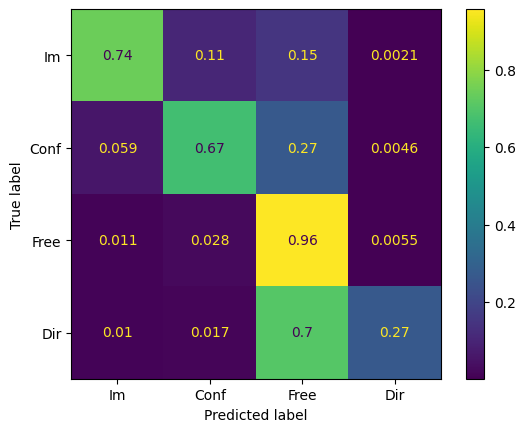

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(segment_metrics['real_state'], segment_metrics['predicted_state'], normalize='true', display_labels=['Im', 'Conf', 'Free', 'Dir'])
plt.show()

In [10]:
#filtered_segment_metrics = segment_metrics[-3 < np.log10(segment_metrics['real_d'])]
#filtered_segment_metrics = filtered_segment_metrics[np.log10(filtered_segment_metrics['real_d']) < 3]
#filtered_segment_metrics = filtered_segment_metrics[-3 < np.log10(filtered_segment_metrics['predicted_d'])]
#filtered_segment_metrics = filtered_segment_metrics[np.log10(filtered_segment_metrics['predicted_d']) < 3]

filtered_segment_metrics = segment_metrics[0 != segment_metrics['real_d']]
filtered_segment_metrics = filtered_segment_metrics[0 != filtered_segment_metrics['predicted_d']]

(array([[305.,  93.,  60.,  34.,  22.,  33.,  44.,  33.,  48.,  64., 109.,
         236.,  59.,  25.,  18.,  12.,  11.,   6.,  11.,   4.,   6.,   4.,
           2.,   2.,   1.],
        [195., 172.,  92.,  41.,  49.,  31.,  29.,  38.,  40.,  71.,  92.,
         204.,  71.,  26.,  16.,  12.,   6.,  14.,   8.,   1.,   4.,   2.,
           1.,   4.,   1.],
        [ 56., 157., 198.,  96.,  65.,  43.,  33.,  40.,  34.,  40.,  64.,
         204.,  48.,  22.,  20.,  13.,   7.,   6.,  12.,   4.,   5.,   4.,
           2.,   0.,   0.],
        [ 29.,  68., 197., 187.,  97.,  45.,  33.,  33.,  54.,  50.,  56.,
         184.,  45.,  16.,  12.,   9.,   5.,   8.,   4.,  10.,   9.,   0.,
           2.,   1.,   0.],
        [ 27.,  26.,  81., 207., 198.,  88.,  45.,  32.,  24.,  43.,  79.,
         218.,  44.,  27.,  17.,  12.,  10.,   6.,   3.,   4.,   3.,   0.,
           2.,   3.,   0.],
        [  8.,  12.,  44., 141., 245., 138., 100.,  78.,  39.,  35.,  77.,
         211.,  65.,  24.,  22.,  1

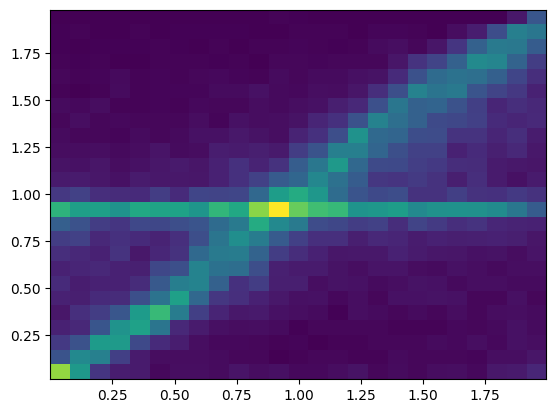

In [11]:
plt.hist2d(filtered_segment_metrics['real_alpha'], filtered_segment_metrics['predicted_alpha'], bins=25)

(array([[0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 1.400e+01, 1.000e+01, 1.100e+01, 1.000e+00, 0.000e+00,
         1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
         3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00],
        [4.000e+00, 2.600e+01, 5.700e

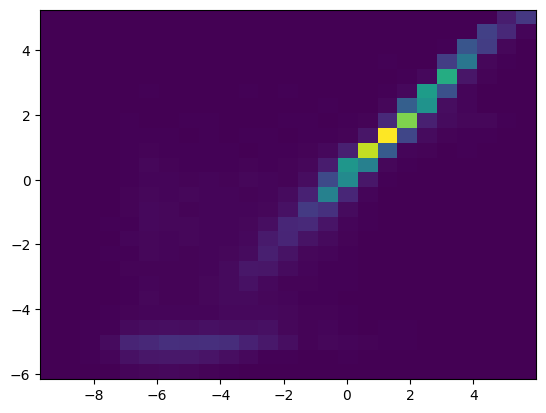

In [25]:
plt.hist2d(np.log10(filtered_segment_metrics['real_d']), np.log10(filtered_segment_metrics['predicted_d']), bins=25)